In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import geopandas as gpd
from scipy import stats
import pycountry
from bokeh.plotting import figure, show, save, output_file
from bokeh.io import curdoc, show, output_notebook, export_png

%matplotlib inline
output_notebook()

Loading BokehJS ...

### Introduction
#### Suicide has been an issue faced in both developing and developed countriqes. Suicide rates has been high in the past years. To find some of the key factors of high suicide rate, this data will be analysed

In [2]:
# reads the data from the appropriate file path and store it in the data variable as a pandas DataFrame.       
df = pd.read_csv('C:/Users/ITProdigies/Data_Analysis_Portfolio/Exploratory Data Analysis/master.csv')

# display few rows of the dataframe in pandas
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


#### Here, observed are the number of columns, data types, non-null and memory usage present in the datasets

In [4]:
#  a quick overview of the central tendency and spread of numerical data
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [5]:
# Generate summary statistics for object (string) columns
df.describe(include=['O'])

,country,sex,age,country-year,gdp_for_year ($),generation
count,27820,27820,27820,27820,27820,27820
unique,101,2,6,2321,2321,6
top,Mauritius,male,15-24 years,Albania1987,"2,156,624,900",Generation X
freq,382,13910,4642,12,12,6408


In [6]:
df.shape

(27820, 12)

In [7]:
df.isnull().any()

country               False
year                  False
sex                   False
age                   False
suicides_no           False
population            False
suicides/100k pop     False
country-year          False
HDI for year           True
 gdp_for_year ($)     False
gdp_per_capita ($)    False
generation            False
dtype: bool

#### HDI for year has missing values, let's find how many percentage of data is missen to decide if the column will be dropped

In [8]:
# display count of missing values
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [9]:
df['HDI for year'].isnull().sum()/df.shape[0]*100

69.93529834651329

In [10]:
# The percentage of missing values for HDI for year is approximately 70% hence it will be dropped
df_drop = df.drop('HDI for year', axis = 1)

In [11]:
#the new data shape (rows, columns)
df_drop.shape

(27820, 11)

In [12]:
df_drop.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [13]:
df_drop.rename(columns={"suicides/100k pop":"suicides_pop"," gdp_for_year ($) ":"gdp_per_year", "gdp_per_capita ($) ":"gdp_per_capita",
                    "gdp_per_capita ($)":"gdp_per_capita"}, inplace=True)
print(df_drop.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_pop', 'country-year', 'gdp_per_year', 'gdp_per_capita',
       'generation'],
      dtype='object')


Text(0, 0.5, 'Values')

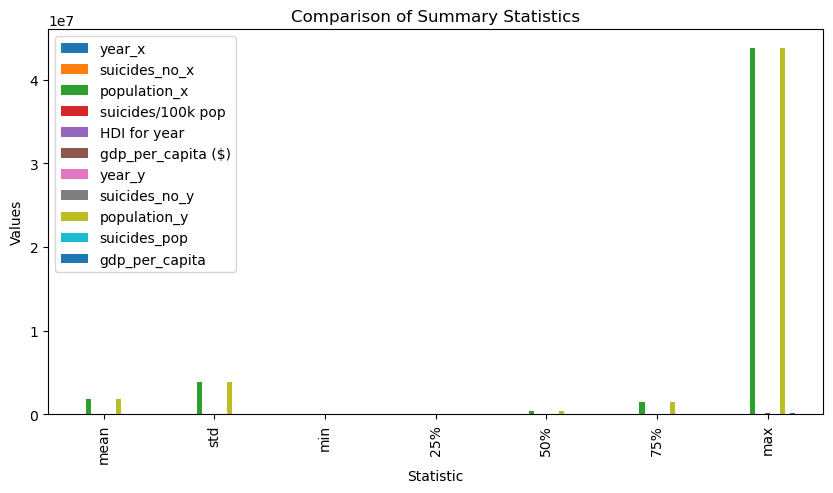

In [14]:
# Calculate summary statistics for the original DataFrame
original_stats = df.describe()

columns_to_compare = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']
# Reshape the data for both DataFrames using melt
original_stats_melted = original_stats.loc[columns_to_compare].reset_index()
original_stats_melted = original_stats_melted.rename(columns={'index': 'Statistic', 'mean': 'Original'})

df_drop_stats = df_drop.describe()
df_drop_stats_melted = df_drop_stats.loc[columns_to_compare].reset_index()
df_drop_stats_melted = df_drop_stats_melted.rename(columns={'index': 'Statistic', 'mean': 'NewData'})

# Combine the data into a single DataFrame
comparison_data = pd.merge(original_stats_melted, df_drop_stats_melted, on='Statistic')

# Create a grouped bar chart to compare the statistics
ax = comparison_data.plot(x='Statistic', kind='bar', figsize=(10, 5))
plt.title('Comparison of Summary Statistics')
plt.ylabel('Values')
#plt.xticks(rotation=0)

#### Let's Explore

<Axes: >

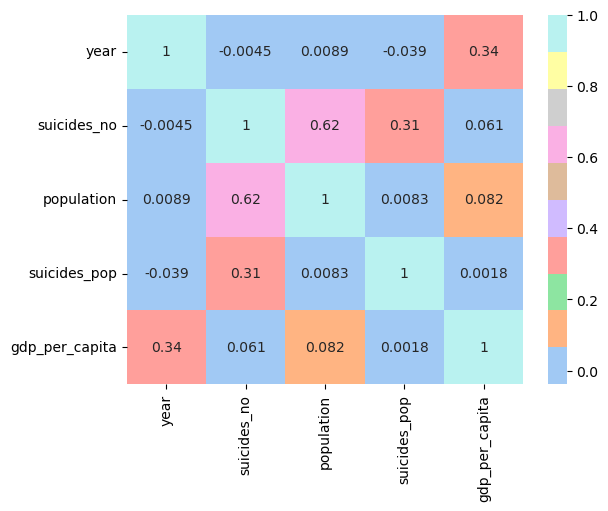

In [15]:
# check for correllations between neighbours
sns.heatmap(df_drop.corr(numeric_only=True),annot=True, cmap = sns.color_palette("pastel"))

Text(0.5, 1.0, 'Suicides Number by Year for Males and Females')

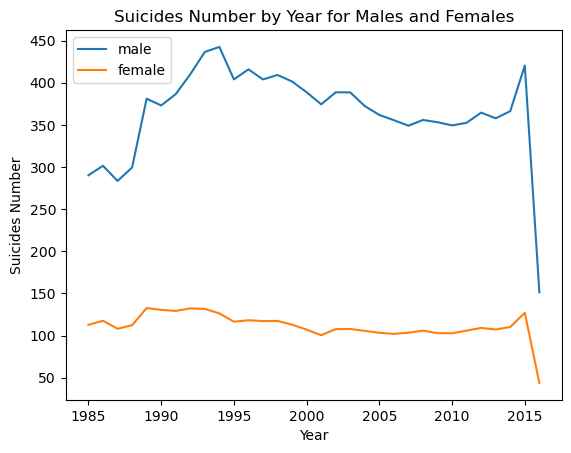

In [16]:
male = df_drop[df_drop.sex == 'male']
female = df_drop[df_drop.sex == 'female']
sns.lineplot(x = male.year, y = df_drop.suicides_no, errorbar = None)
sns.lineplot(x = female.year, y = df_drop.suicides_no, errorbar = None)
plt.legend(['male', 'female'])
plt.xlabel('Year')
plt.ylabel('Suicides Number')
plt.title('Suicides Number by Year for Males and Females')

##### This Data shows that the suicide age in male is almost three times higher than female all through the year

##### If gender is a factor of suicide, what about age?

<Axes: xlabel='year'>

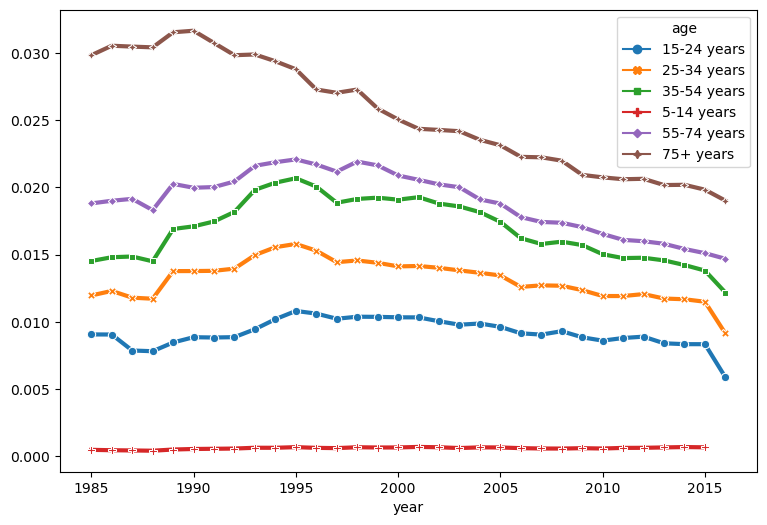

In [17]:
df_drop1 = df_drop.groupby(['year', 'age'])[['suicides_no', 'population']].sum()

df_drop1_reset = df_drop1.copy().reset_index()
plt.figure(figsize=(9, 6))
sns.lineplot(x='year', y=(df_drop1_reset['suicides_no'] / df_drop1_reset['population']) * 100, hue='age',
             data=df_drop1_reset, linewidth=3, style='age', markers=True, dashes=False)


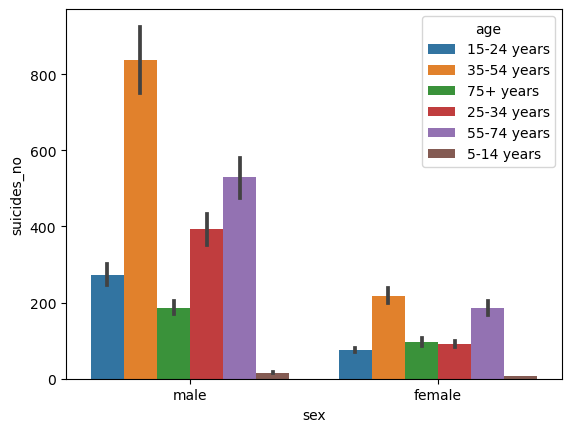

In [18]:
# visualize the distribution of suicides across various age groups and the differences between genders within each age category.
barchart_age = sns.barplot (x = 'sex', y = 'suicides_no', hue = 'age', data = df_drop)

In [19]:
df_drop.shape

(27820, 11)

###### The suicide rate increases with age, it is observed to be even higher in older generation than the population of ages between 15 and 54 as opposed to recent times. Why so?

<Axes: xlabel='year'>

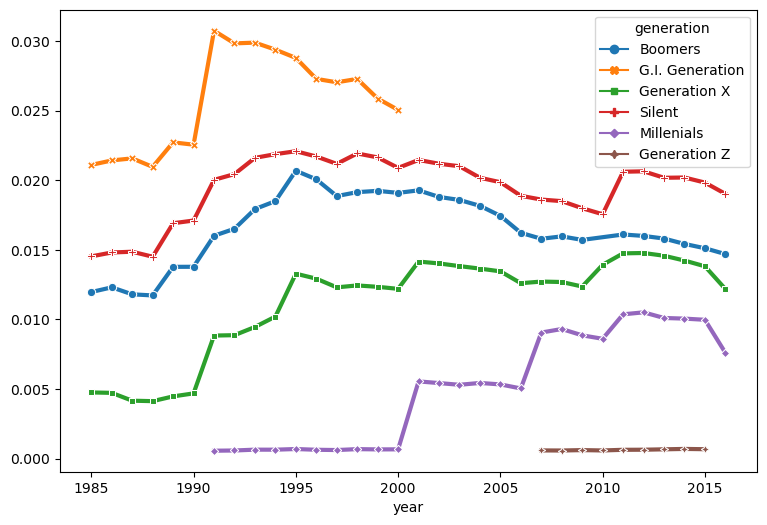

In [20]:
df_drop2 = df_drop.groupby(['year', 'generation'])[['suicides_no', 'population']].sum()
df_drop2_generation_reset = df_drop2.copy().reset_index()
plt.figure(figsize = (9, 6))
sns.lineplot(x='year', y= (df_drop2_generation_reset['suicides_no']/ df_drop2_generation_reset['population'])*100, 
             hue='generation', data = df_drop2_generation_reset, linewidth = 3, style = 'generation', markers = True, dashes = False)

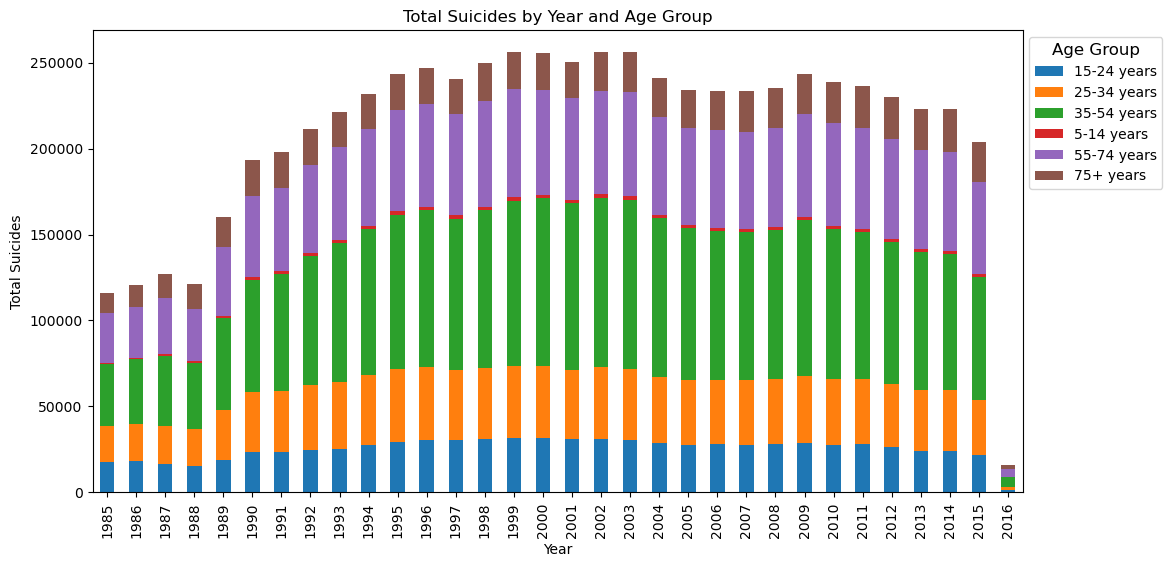

In [21]:
# Compare the results by grouping the barchart

#Group the data by 'year' and 'age' and sum the 'suicides_no' column
year_age_suicides = df_drop.groupby(['year', 'age'])['suicides_no'].sum().unstack()

# Create a grouped bar chart
ax = year_age_suicides.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.title('Total Suicides by Year and Age Group')

# Customize the legend and axis labels
ax.legend(title='Age Group', title_fontsize='12', loc='upper left', bbox_to_anchor=(1, 1))

##### It can be observed that the Generation I (WW2 Generation) had the highest suicide rate before 2000 while the suicide rate increased in Generation X and the millenials and for the silent generation there was a decrease from the year 2000 to 2010.

##### The reason for high suicide rate for Generation I could be as a result of war, but what could be the factor to the suicide rate in recent time?

In [22]:
df1 = df_drop.groupby('country')['suicides_no'].sum()
country_name = list(df1.index.get_level_values(0))
len(country_name)


101

In [23]:
# Calculate the suicide rate for each and its mean
df_suicide_each_year = df_drop.groupby(["country","year"])["suicides_no"].sum()
df_sum = df_suicide_each_year.sort_index(ascending=True)[:] * 100

df_pop = df_drop.groupby(["country","year"]).population.sum()
df_pop_sum = df_pop.sort_index(ascending=False)[:]

df_total = df_sum / df_pop_sum
df_total.head(20)

country  year
Albania  1987    0.002694
         1988    0.002279
         1989    0.002426
         1992    0.001665
         1993    0.002600
         1994    0.001755
         1995    0.003031
         1996    0.003027
         1997    0.005710
         1998    0.005112
         1999    0.004588
         2000    0.001931
         2001    0.004251
         2002    0.004718
         2003    0.004360
         2004    0.005078
         2005    0.000000
         2006    0.000000
         2007    0.004476
         2008    0.005803
dtype: float64

In [24]:
country_dict={}
for country in df_total.index.get_level_values(0):
    if country not in country_dict.keys():
        country_dict[country] = df_total[country].mean()
    else:
        pass

tup = list(country_dict.items())
tup.sort(key= lambda pair:pair[1], reverse = True)

country_list = [a[0] for a in tup]
country_suicide = [a[1] for a in tup]

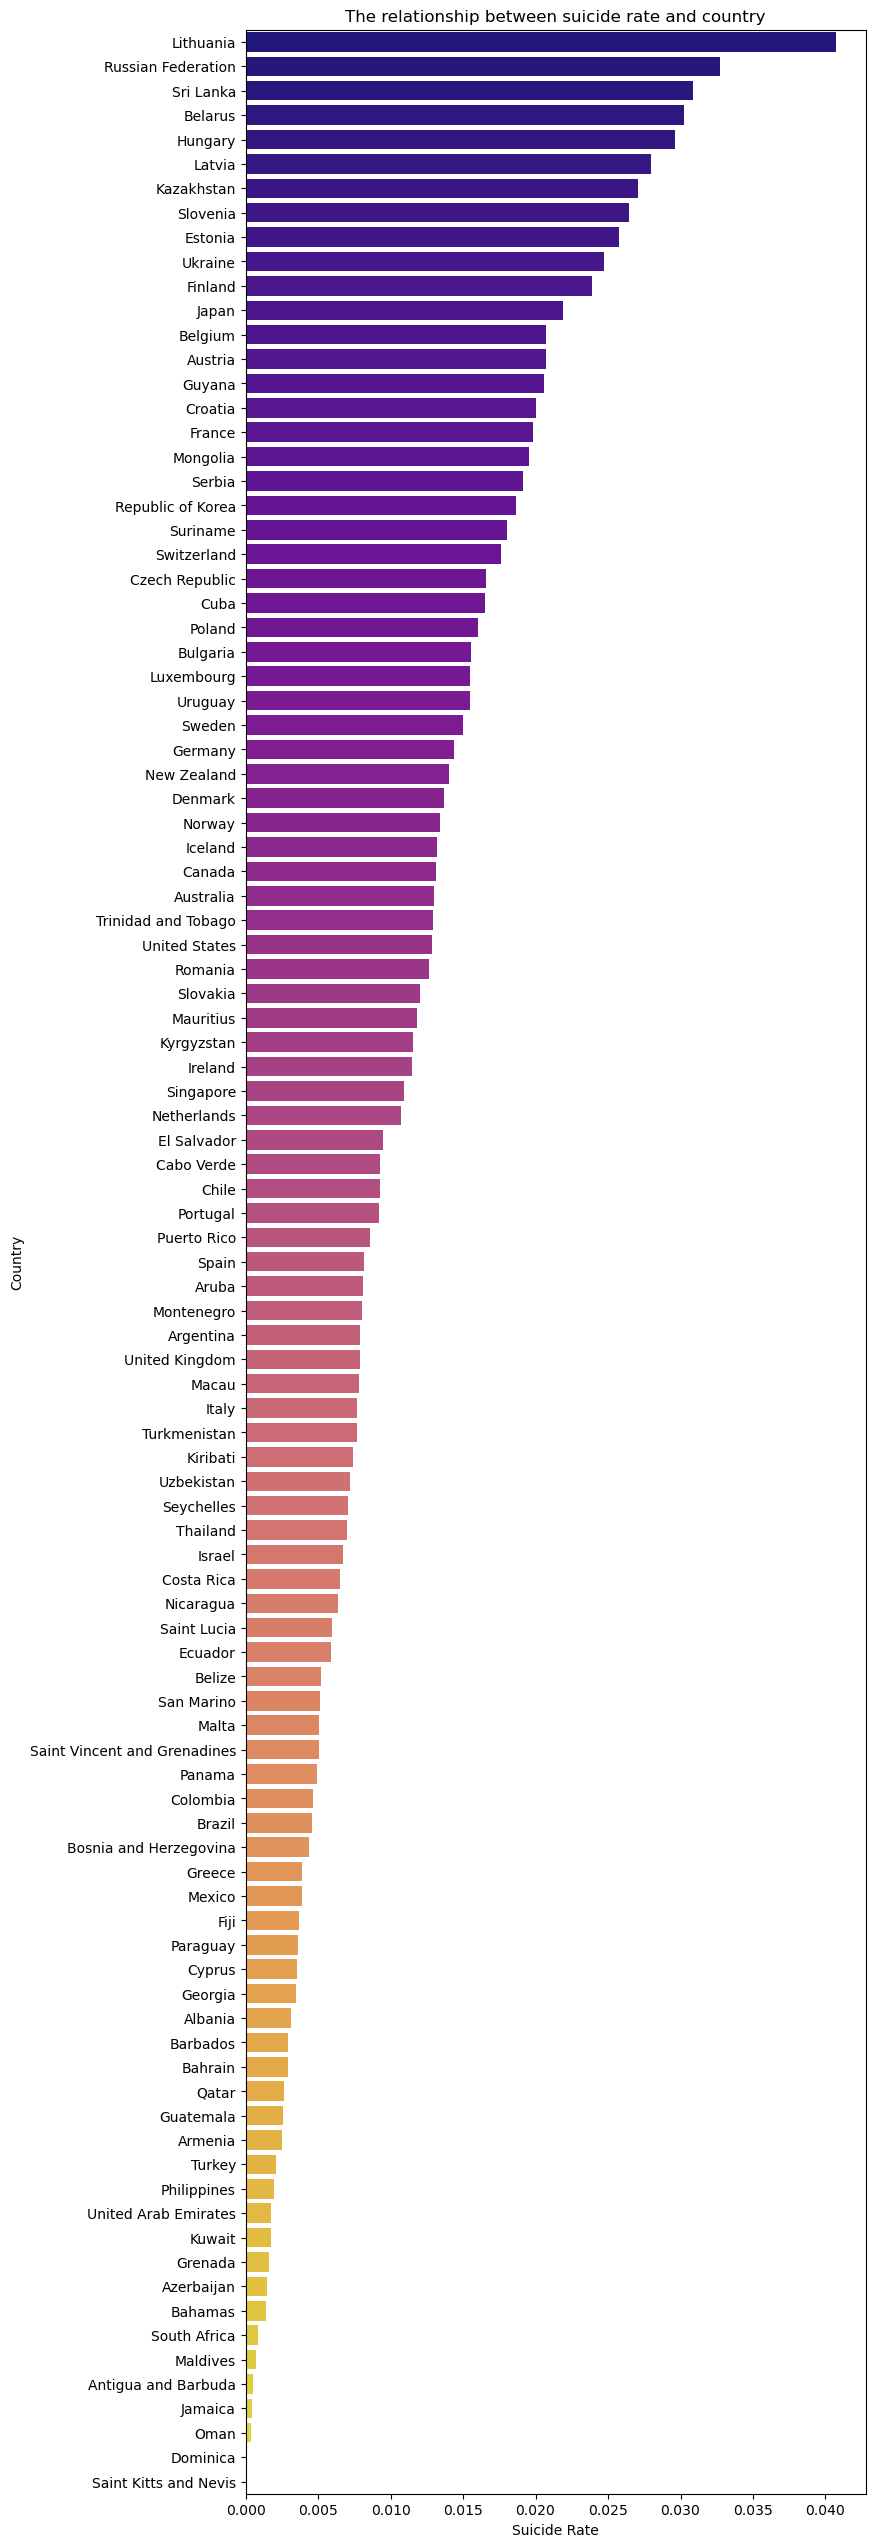

In [25]:
plt.figure(figsize=(8,32))
sns.barplot(x=country_suicide[:],y=country_list[:], palette="plasma")
plt.xlabel("Suicide Rate")
plt.ylabel("Country")
plt.title("The relationship between suicide rate and country")
plt.show()